In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
books = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv')

## The data

I am using data of the 10,000 most popular book from Goodreads. Popularity is defined as having the most reviews (these are not necessarily good reviews).

Before starting I need to clean the data. I will also create a sub-dataset of the top 500 books for use with some questions.

In [3]:
books['original_publication_year'] = abs(books['original_publication_year'])
books.dropna(subset=['original_publication_year'], inplace=True)
books.original_publication_year = books.original_publication_year.astype(int)
books_500 = books.loc[:499,]

## Choose one variable and plot that variable four different ways

I choose original publication year.

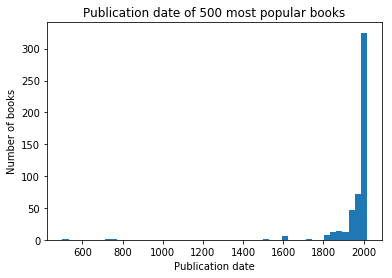

In [4]:
plt.hist(books_500.original_publication_year, bins=50)
plt.title('Publication date of 500 most popular books')
plt.ylabel('Number of books')
plt.xlabel('Publication date')
plt.show()

This plot shows that the vast majority of books were published after 1750, but is not a lot more informative than that.

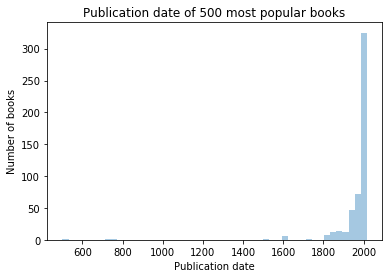

In [5]:
sns.distplot(books_500.original_publication_year, kde = False)
plt.title('Publication date of 500 most popular books')
plt.ylabel('Number of books')
plt.xlabel('Publication date')
plt.show()

Seaborn's plot is basically the same.

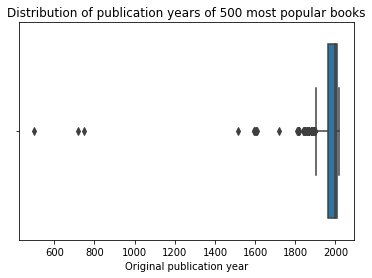

In [6]:
sns.boxplot(x=books_500.loc[books_500['original_publication_year'] > 0, 'original_publication_year'])
plt.xlabel('Original publication year')
plt.title('Distribution of publication years of 500 most popular books')
plt.show()

This plot would be much easier to see if the outliers were removed.

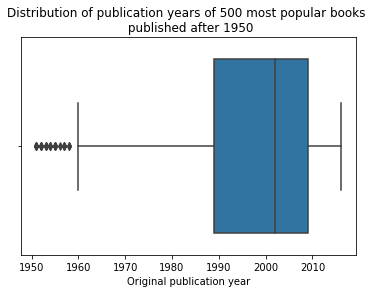

In [7]:
sns.boxplot(x=books_500.loc[books_500['original_publication_year'] > 1950, 'original_publication_year'])
plt.xlabel('Original publication year')
plt.title('Distribution of publication years of 500 most popular books \n published after 1950')
plt.show()

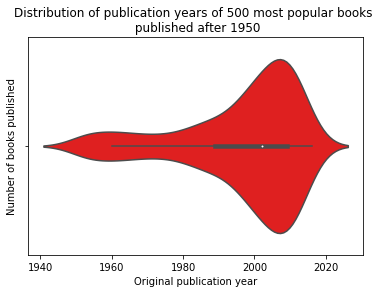

In [8]:
g = sns.violinplot(x=books_500.loc[books_500['original_publication_year']>1950, 'original_publication_year'], color='red')
plt.xlabel("Original publication year")
plt.ylabel('Number of books published')
plt.title('Distribution of publication years of 500 most popular books \n published after 1950')
plt.show()

I find this plot a bit unclear. I have excluded data before 1950 but the graph looks as though this is included and the numbers just tail off.

## Choose two continuous variables, and plot them three different ways

I am going to look at the relationship between 1 star and 5 star ratings.


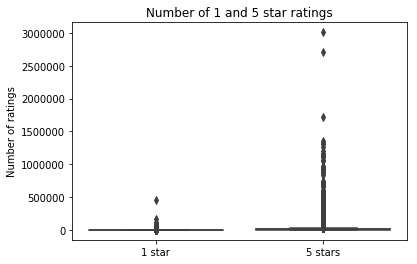

In [9]:
book_ratings = books.loc[:, ['book_id', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'work_ratings_count', 'original_publication_year']]
book_ratings_long = pd.melt(book_ratings, id_vars=['book_id', 'original_publication_year', 'work_ratings_count'], var_name='rating_type', value_name='rating_count')

ratings_1_5 = ['ratings_1', 'ratings_5']
book_ratings_long_1_5 = book_ratings_long[book_ratings_long.rating_type.isin(ratings_1_5)]

sns.boxplot(x='rating_type', y='rating_count', data = book_ratings_long_1_5)
plt.ylabel('Number of ratings')
plt.xlabel('')
plt.xticks([0, 1], ['1 star', '5 stars'])
plt.title('Number of 1 and 5 star ratings')
plt.show()

The magnitude of the difference in how many times some books have been rated compared to others makes these graphs pretty worthless. To deal with this I will convert the ratings into percentages of the total ratings.

In [10]:
book_ratings['ratings_1_pc'] = book_ratings['ratings_1'] / book_ratings['work_ratings_count']
book_ratings['ratings_2_pc'] = book_ratings['ratings_2'] / book_ratings['work_ratings_count']
book_ratings['ratings_3_pc'] = book_ratings['ratings_3'] / book_ratings['work_ratings_count']
book_ratings['ratings_4_pc'] = book_ratings['ratings_4'] / book_ratings['work_ratings_count']
book_ratings['ratings_5_pc'] = book_ratings['ratings_5'] / book_ratings['work_ratings_count']

book_ratings_pc = book_ratings[['book_id', 'work_ratings_count', 'original_publication_year', 'ratings_1_pc', 'ratings_2_pc', 'ratings_3_pc', 'ratings_4_pc', 'ratings_5_pc']]
book_ratings_pc_long = pd.melt(book_ratings_pc, id_vars=['book_id', 'work_ratings_count', 'original_publication_year'], var_name='rating_type', value_name='rating_pc')

ratings_1_5_pc = ['ratings_1_pc', 
                 'ratings_5_pc']
book_ratings_pc_long_1_5 = book_ratings_pc_long[book_ratings_pc_long.rating_type.isin(ratings_1_5_pc)]

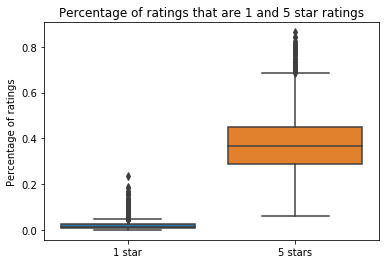

In [11]:
sns.boxplot(x='rating_type', y='rating_pc', data = book_ratings_pc_long_1_5)
plt.ylabel('Percentage of ratings')
plt.xlabel('')
plt.xticks([0, 1], ['1 star', '5 stars'])
plt.title('Percentage of ratings that are 1 and 5 star ratings')
plt.show()

This graph shows that of the 10,000 most popular books (i.e. those with the most reviews), the percentage of ratings books receive that are 5 stars can range from around 5% to 85%, but 1 star reviews range from around 0 to 25%.

We can conclude that people are less likely to review books they hate (as these are the most reviewed books).

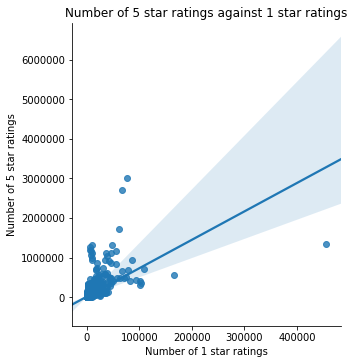

In [12]:
g = sns.lmplot(y='ratings_5', x='ratings_1', data=books)
plt.ylabel('Number of 5 star ratings')
g.set_xlabels('Number of 1 star ratings')
plt.title('Number of 5 star ratings against 1 star ratings')
plt.show()

This plot is also heavily skewed by some books with a large number of ratings, but the trend is clear - books with more 5 star ratings also get more 1 star ratings.

Again this might make more sense to look at it as a percentage.

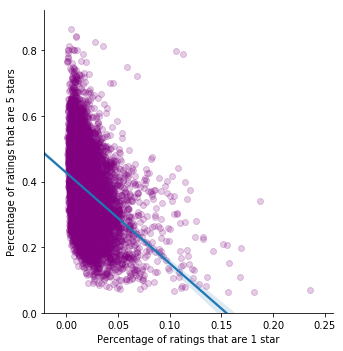

In [13]:
g = sns.lmplot(x='ratings_1_pc', y = 'ratings_5_pc', data=book_ratings_pc,
              scatter_kws={'color':'purple', 'alpha':0.2})
g.set(ylim=(0, None))
plt.ylabel('Percentage of ratings that are 5 stars')
plt.xlabel('Percentage of ratings that are 1 star')
plt.show()

This graph shows a clear trend of the higher the percentage of 5 star reviews, the lower the percentage of 1 star reviews. However, there are some outliers - books which have a lot of one star and five star reviews. These might be particularly controversial titles.

This trend can be seen more clearly if just the top 500 are considered.

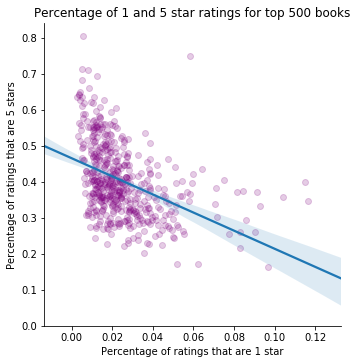

In [14]:
g = sns.lmplot(x='ratings_1_pc', y = 'ratings_5_pc', 
               data=book_ratings_pc.loc[:499,],
              scatter_kws={'color':'purple', 'alpha':0.2})
g.set(ylim=(0, None))
plt.ylabel('Percentage of ratings that are 5 stars')
plt.xlabel('Percentage of ratings that are 1 star')
plt.title('Percentage of 1 and 5 star ratings for top 500 books')
plt.show()

The plot below shows the same data using a hex plot which makes it easier to see where the most dense areas are.

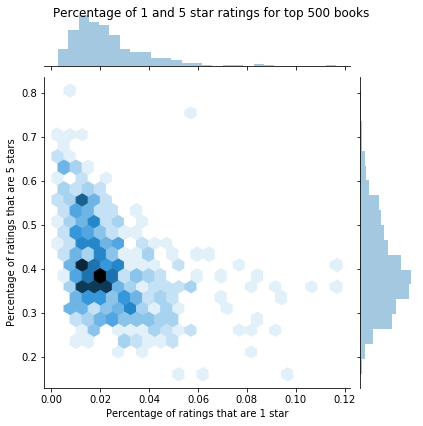

In [15]:
g = sns.jointplot(x='ratings_1_pc', y='ratings_5_pc', kind='hex', 
             data=book_ratings_pc.loc[:499,])
g.set_axis_labels('Percentage of ratings that are 1 star', 'Percentage of ratings that are 5 stars')
g.fig.suptitle('Percentage of 1 and 5 star ratings for top 500 books')
plt.show()

## Choose one continuous variable and one categorical variable, and plot them six different ways

There are no great categorical variables here, but I will use original publication year as a categorical variable.

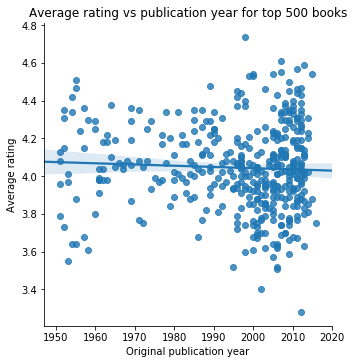

In [16]:
g = sns.lmplot(x='original_publication_year', y='average_rating', data=books_500.loc[books_500.original_publication_year > 1950,])
plt.ylabel('Average rating')
plt.xlabel('Original publication year')
plt.title('Average rating vs publication year for top 500 books')
plt.show()

There does not appear to be a trend connecting average rating and original publication year. Let's look at all books.

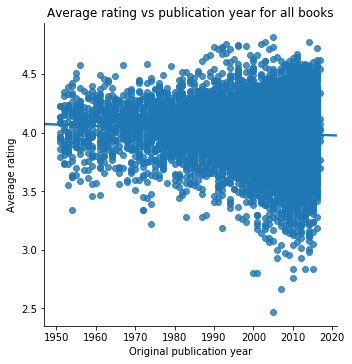

In [17]:
g = sns.lmplot(x='original_publication_year', y='average_rating', data=books.loc[books.original_publication_year > 1950,])
plt.ylabel('Average rating')
plt.xlabel('Original publication year')
plt.title('Average rating vs publication year for all books')
plt.show()

As before, there is basically zero trend, though the variation is increasing over time.

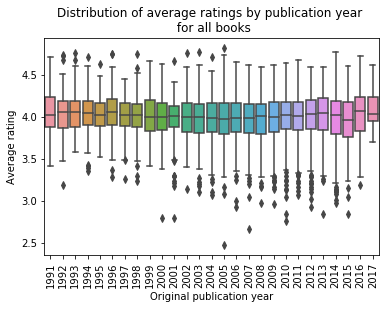

In [18]:
sns.boxplot(x='original_publication_year', y='average_rating', data=books[books.original_publication_year > 1990])
plt.ylabel('Average rating')
plt.xlabel('Original publication year')
plt.xticks(rotation='vertical')
plt.title('Distribution of average ratings by publication year \n for all books')
plt.show()

The median rating is almost the same every year. Opinions are perhaps deviating slightly more in more recent years.

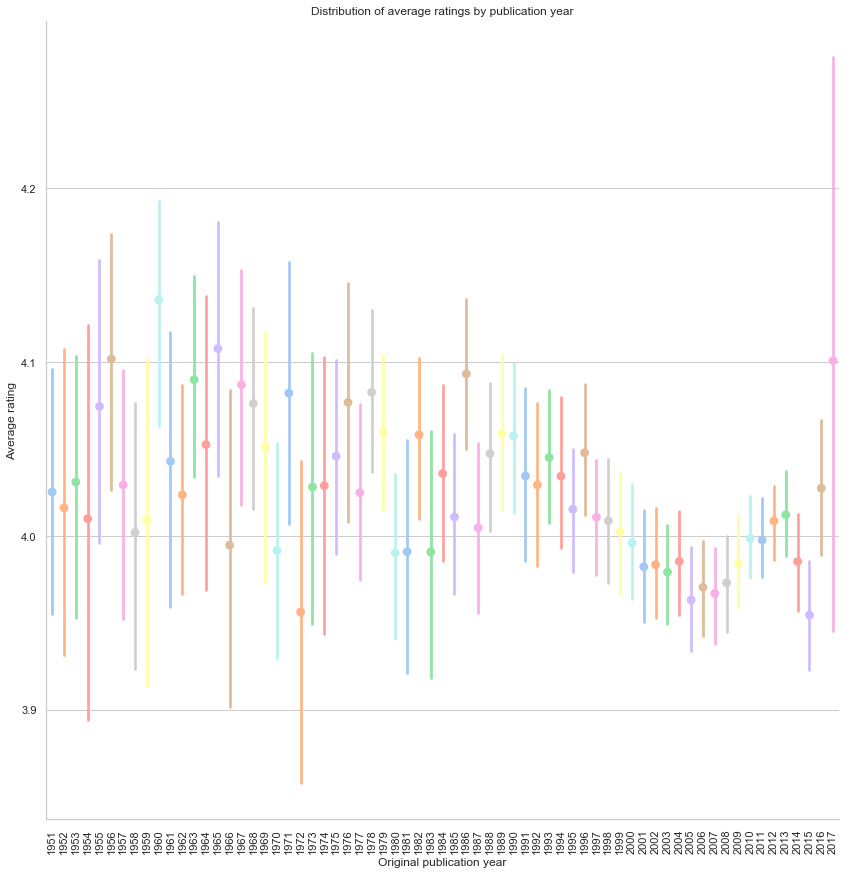

In [19]:
sns.set(style='whitegrid')
g = sns.catplot(y='average_rating', 
                x='original_publication_year', 
                data=books[books.original_publication_year > 1950],
               height=12,
               kind='point',
               palette='pastel',
               ci=95)
plt.xticks(rotation='vertical')
plt.title('Distribution of average ratings by publication year')
g.set_xlabels('Original publication year')
g.set_ylabels('Average rating')
plt.show()

In this plot the error bars reduce in size over time which is probably a function of having more data.

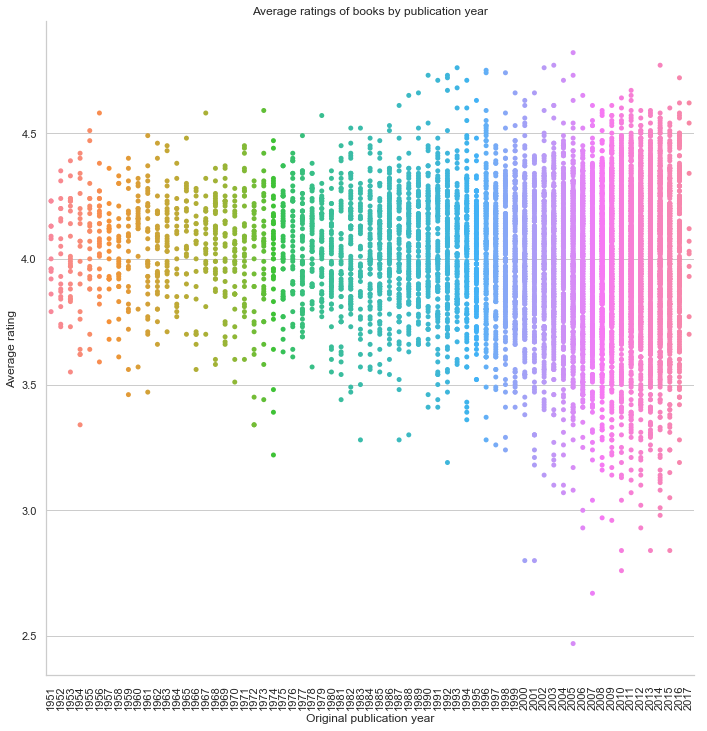

In [20]:
g = sns.catplot(x='original_publication_year', 
                y='average_rating', 
                data=books[books.original_publication_year > 1950],
                jitter=False,
               height=10)
g.set_xlabels('Original publication year')
g.set_ylabels('Average rating')
plt.title('Average ratings of books by publication year')
plt.xticks(rotation='vertical')
plt.show()

This plot clearly shows the increased number of books as the years go on, and the increased variation in average ratings over the same time.

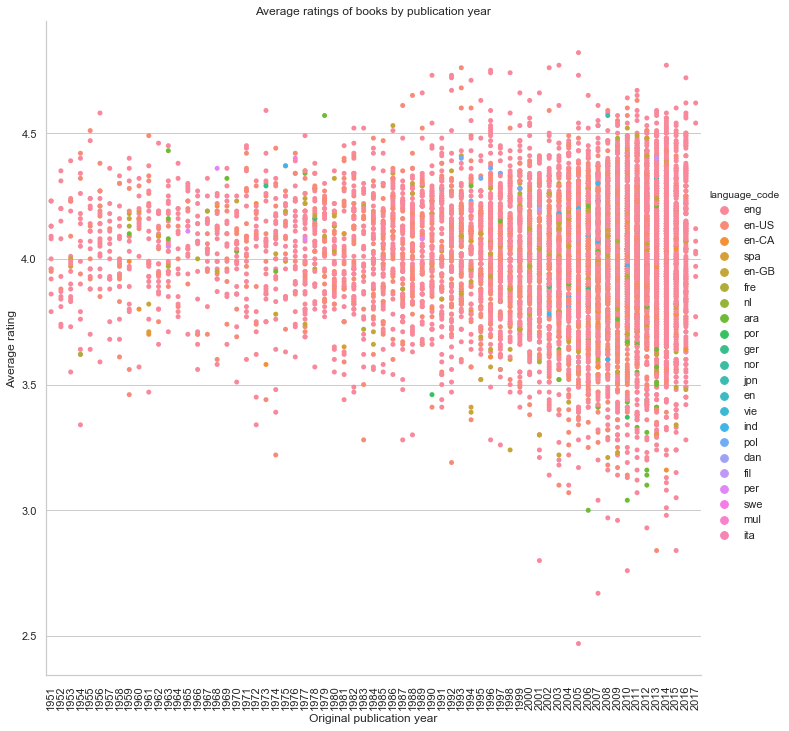

In [21]:
g = sns.catplot(x='original_publication_year', 
                y='average_rating', 
                data=books[books.original_publication_year > 1950],
                jitter=False,
               height=10,
               hue='language_code')
g.set_xlabels('Original publication year')
g.set_ylabels('Average rating')
plt.title('Average ratings of books by publication year')
plt.xticks(rotation='vertical')
plt.show()

Almost all books are in English. It is hard to see because of the overwhelming prevalence of English, but I cannot see a discernable difference in ratings of books in other languages.

## At least 4 continuous variables and one categorical variable

I will look at rating percentages for books published after 2007.

In [22]:
book_ratings_pc_long_2007 = book_ratings_pc_long[book_ratings_pc_long.original_publication_year > 2006]
book_ratings_pc_2007 = book_ratings_pc[book_ratings_pc.original_publication_year > 2006]

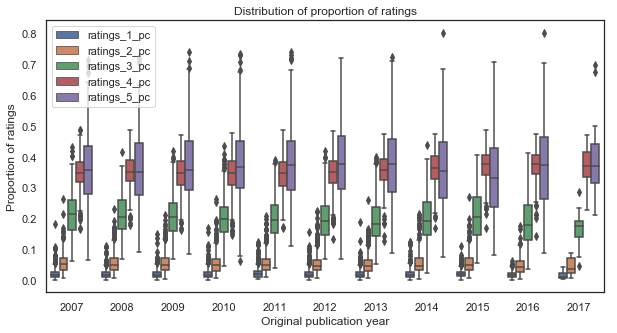

In [23]:
sns.set(style='white')
plt.figure(figsize=(10, 5))
sns.boxplot(x='original_publication_year', 
            y='rating_pc', 
            hue='rating_type',
            data=book_ratings_pc_long_2007)
plt.legend(loc='upper left')
plt.title('Distribution of proportion of ratings')
plt.xlabel('Original publication year')
plt.ylabel('Proportion of ratings')
plt.show()

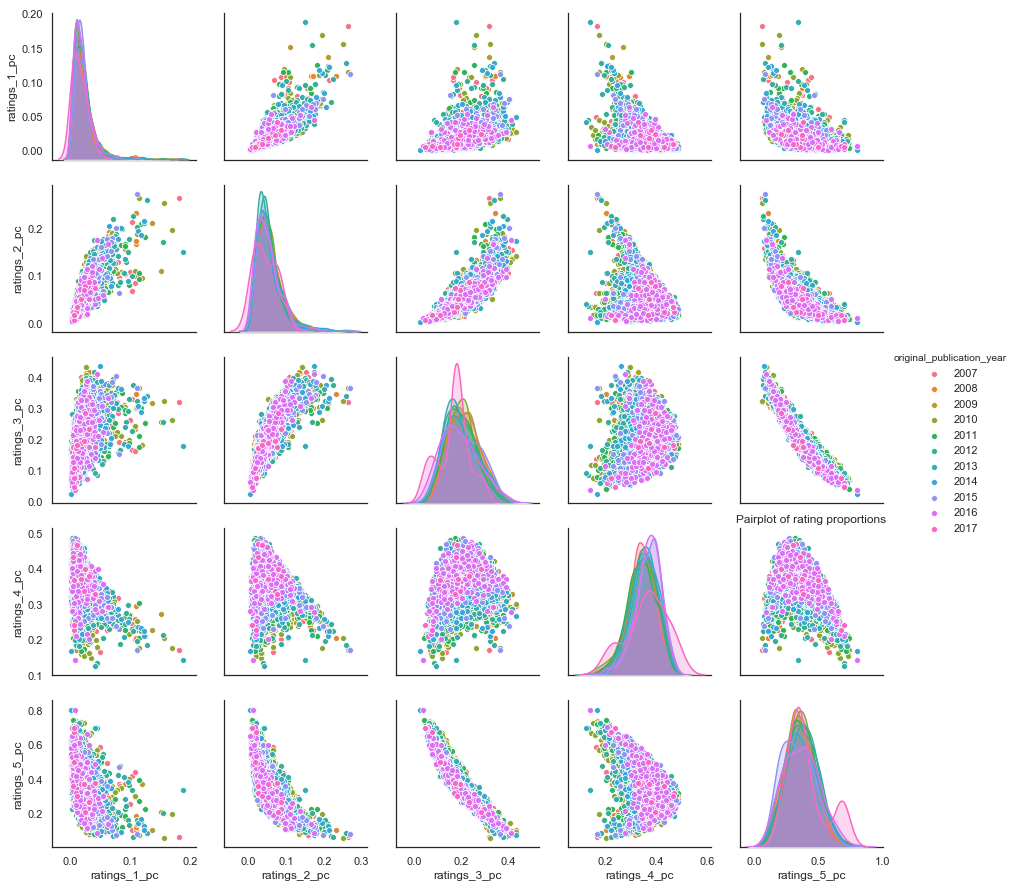

In [24]:
sns.pairplot(book_ratings_pc_2007,
            hue='original_publication_year',
            vars=['ratings_1_pc', 'ratings_2_pc', 'ratings_3_pc', 'ratings_4_pc', 'ratings_5_pc'])
plt.title('Pairplot of rating proportions')
plt.show()

This plot mostly shows what you would expect - if a book get a high proportion of good ratings then it gets a lower proportion of bad ratings. However, there are a few small surprises.

A book with a high proportion of 1 star ratings looks as though it is likely to have a higher proportion of 5 star ratings than 4 star ratings.

The strongest negative correlation is between 3 stars and 5 stars. The weakest correlation is between 4 and 5 stars.